## Digit Classification using MNIST

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
data = pd.read_csv("train.csv")
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split data for train and test

In [105]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

X_train[:, 0].shape


(784,)

### Forward Propagation

In [74]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z2):
    return np.exp(Z2) / sum(np.exp(Z2))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2
    

### Backward Propagation

In [1]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


### Gradient Descent

In [98]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2,= init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2, = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    
    return W1, b1, W2, b2


In [99]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.1)


Iteration:  0
[2 4 2 ... 2 2 2] [9 4 8 ... 6 3 4]
0.09514634146341464
Iteration:  10
[7 4 7 ... 1 5 3] [9 4 8 ... 6 3 4]
0.23407317073170733
Iteration:  20
[7 4 7 ... 1 1 7] [9 4 8 ... 6 3 4]
0.28204878048780485
Iteration:  30
[7 4 7 ... 1 1 7] [9 4 8 ... 6 3 4]
0.32034146341463415
Iteration:  40
[7 4 9 ... 1 2 7] [9 4 8 ... 6 3 4]
0.37041463414634146
Iteration:  50
[9 4 9 ... 6 3 7] [9 4 8 ... 6 3 4]
0.4441219512195122
Iteration:  60
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.514609756097561
Iteration:  70
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.5596341463414635
Iteration:  80
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.5956341463414634
Iteration:  90
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.6287560975609756
Iteration:  100
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.6556585365853659
Iteration:  110
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.6767317073170732
Iteration:  120
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.6938292682926829
Iteration:  130
[9 4 8 ... 6 3 9] [9 4 8 ... 6 3 4]
0.7085365853658536
Iteration:  1

In [100]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  9


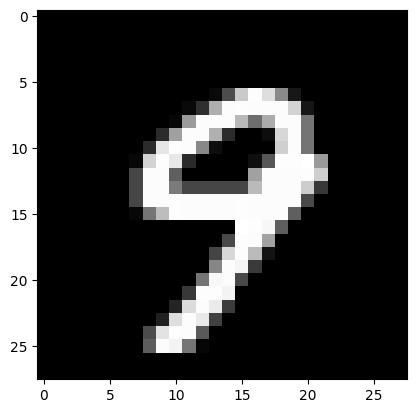

Prediction:  [4]
Label:  4


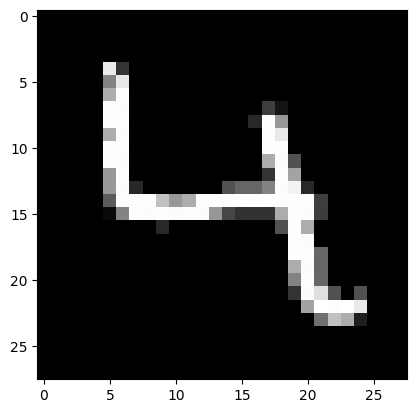

Prediction:  [8]
Label:  8


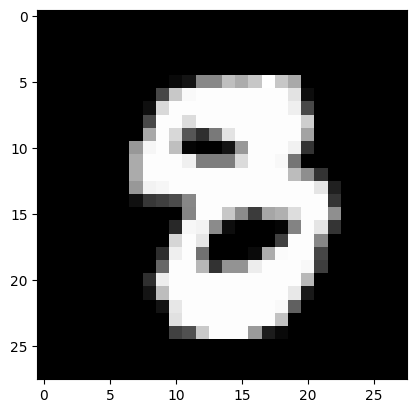

Prediction:  [9]
Label:  9


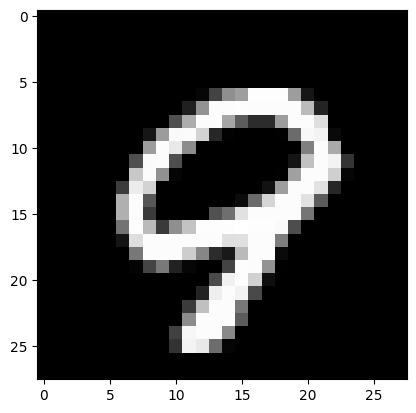

In [101]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [106]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[9 2 7 3 6 7 0 6 1 6 8 7 4 4 4 4 0 0 2 3 5 4 7 7 7 4 8 4 6 2 4 7 2 8 7 8 9
 2 7 4 6 9 8 3 7 5 0 5 4 3 9 0 8 3 8 7 1 5 6 7 0 8 4 7 7 3 4 7 7 7 5 3 1 7
 7 5 0 3 4 8 1 3 3 0 8 3 3 2 2 7 0 9 4 5 3 9 5 9 4 9 2 4 2 7 3 3 6 6 6 4 3
 8 5 0 9 5 1 4 1 2 9 7 1 6 3 8 1 9 9 3 2 5 7 4 6 9 7 9 8 8 4 3 1 2 5 5 3 4
 7 5 1 7 4 2 9 8 4 0 4 5 3 1 5 4 6 6 1 8 3 2 9 4 1 5 9 8 1 6 2 3 5 5 2 8 1
 1 1 4 0 7 2 8 6 8 1 3 6 7 1 3 0 1 1 4 0 5 3 9 3 0 8 1 4 0 8 0 2 6 2 6 8 6
 8 5 6 7 9 0 9 4 5 0 7 3 7 1 3 5 0 3 9 6 0 7 2 3 7 8 1 0 8 7 1 7 6 1 6 9 2
 1 9 5 9 3 4 0 1 7 5 7 4 9 7 7 9 7 7 7 5 8 2 5 9 0 3 6 5 1 5 6 3 8 2 7 5 8
 8 4 2 4 2 2 1 4 9 6 0 1 9 1 1 9 2 3 8 4 8 7 9 1 2 1 7 4 4 5 6 0 4 4 1 4 3
 2 6 1 5 8 0 6 2 7 1 2 1 8 8 0 0 8 1 7 3 4 6 3 1 1 2 0 8 0 4 9 0 4 9 4 3 3
 3 1 1 3 8 1 0 8 4 1 1 7 4 7 1 3 7 6 4 9 1 7 4 7 1 2 1 3 0 0 4 1 9 9 2 9 6
 4 1 9 8 0 9 3 0 9 1 1 1 1 6 9 7 0 4 2 6 5 0 3 0 0 3 2 0 9 3 9 3 9 3 6 9 7
 6 1 3 9 0 2 0 5 1 6 7 7 3 0 7 8 0 1 9 0 6 9 4 2 2 0 9 9 3 9 8 8 3 8 7 5 1
 8 2 2 9 2 7 5 8 6 6 0 5 

0.859